In [1]:
import os
import itertools
import numpy as np
import operator
import math
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
def grouper(n, iterable, fillvalue=None):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

In [3]:
doctopic_triples = []
mallet_docnames = []

In [4]:
#here you can put the strings you want to get rid off when showing the titles
list_authors_to_replace=['Zola-Emile','Dumas-Alexandre-Pere','Dumas-Alexandre','Balzac-Honore-de','Verne-Jules','Sand-George','Flaubert-Gustave']
list_authors_to_find=['Zola-Emile']

In [5]:
def replace_all(text, dic):
    for i in dic:
        text = text.replace(i, "")
    return text

In [6]:
with open("/home/odysseus/Bureau/ANR/code/topic_modelling_mallet/results/doc-topics-chaps.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, *values = line.rstrip().split('\t')
        docname = os.path.basename(docname)
        if docname.split('_')[1] in list_authors_to_find and ('_1.' in docname or '_2.' in docname):
            #docname=replace_all(docname, list_authors_to_replace)
            docname=docname[5:len(docname)-4]
            mallet_docnames.append(docname)
            print(docname)
            for topic, share in grouper(2, values):
                triple = (docname, int(topic), float(share))
                doctopic_triples.append(triple)

Zola-Emile_L-assomoir_1
Zola-Emile_Germinal_1
Zola-Emile_Nana_1
Zola-Emile_La-fortune-des-Rougon_1
Zola-Emile_La-fortune-des-Rougon_2
Zola-Emile_La-curee_1
Zola-Emile_Pot-Bouille_1
Zola-Emile_Au-bonheur-des-dames_1
Zola-Emile_Germinal_2
Zola-Emile_La-curee_2
Zola-Emile_Au-bonheur-des-dames_2
Zola-Emile_Nana_2
Zola-Emile_Pot-Bouille_2
Zola-Emile_Une-page-d-amour_2
Zola-Emile_La-faute-de-l-abbe-Mouret_1
Zola-Emile_L-assomoir_2
Zola-Emile_La-faute-de-l-abbe-Mouret_2
Zola-Emile_Une-page-d-amour_1


In [7]:
print(doctopic_triples)

[('Zola-Emile_L-assomoir_1', 7, 0.24295774647887325), ('Zola-Emile_L-assomoir_1', 14, 0.10915492957746478), ('Zola-Emile_L-assomoir_1', 10, 0.0880281690140845), ('Zola-Emile_L-assomoir_1', 16, 0.08098591549295775), ('Zola-Emile_L-assomoir_1', 9, 0.07394366197183098), ('Zola-Emile_L-assomoir_1', 11, 0.06690140845070422), ('Zola-Emile_L-assomoir_1', 2, 0.03873239436619718), ('Zola-Emile_L-assomoir_1', 0, 0.03873239436619718), ('Zola-Emile_L-assomoir_1', 1, 0.03169014084507042), ('Zola-Emile_L-assomoir_1', 17, 0.02464788732394366), ('Zola-Emile_L-assomoir_1', 13, 0.02464788732394366), ('Zola-Emile_L-assomoir_1', 8, 0.02464788732394366), ('Zola-Emile_L-assomoir_1', 6, 0.02464788732394366), ('Zola-Emile_L-assomoir_1', 4, 0.02464788732394366), ('Zola-Emile_L-assomoir_1', 19, 0.017605633802816902), ('Zola-Emile_L-assomoir_1', 18, 0.017605633802816902), ('Zola-Emile_L-assomoir_1', 15, 0.017605633802816902), ('Zola-Emile_L-assomoir_1', 12, 0.017605633802816902), ('Zola-Emile_L-assomoir_1', 5, 0

In [8]:
mallet_docnames = sorted(mallet_docnames)

In [9]:
num_docs = len(mallet_docnames)

In [10]:
doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0,1))

In [11]:
num_topics = len(doctopic_triples) // len(mallet_docnames)
print(len(doctopic_triples))
print(num_topics)

360
20


In [12]:
doctopic = np.zeros((num_docs, num_topics))

In [13]:
for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = mallet_docnames.index(docname)
    doctopic[row_num, topic] = share

In [14]:
novel_names = []

In [15]:
for fn in mallet_docnames:
    basename = os.path.basename(fn)
    name, ext = os.path.splitext(basename)
    novel_names.append(name)
print(len(novel_names))

18


In [16]:
novel_names = np.asarray(novel_names)

In [17]:
doctopic

array([[ 0.14053398,  0.04199029,  0.00752427,  0.00364078,  0.09927184,
         0.02354369,  0.01820388,  0.00509709,  0.00169903,  0.09635922,
         0.06966019,  0.00315534,  0.0788835 ,  0.00509709,  0.14150485,
         0.08325243,  0.00606796,  0.11286408,  0.05946602,  0.00218447],
       [ 0.16211519,  0.00273088,  0.01017875,  0.00571003,  0.08167825,
         0.03947368,  0.00322741,  0.02060576,  0.00620655,  0.20283019,
         0.03897716,  0.01315789,  0.12686197,  0.01365442,  0.05238332,
         0.0806852 ,  0.03152929,  0.02706058,  0.07274081,  0.00819265],
       [ 0.02992021,  0.12300532,  0.14029255,  0.00465426,  0.02859043,
         0.02460106,  0.01263298,  0.00731383,  0.01130319,  0.02460106,
         0.00332447,  0.01529255,  0.00864362,  0.13098404,  0.27194149,
         0.0525266 ,  0.01263298,  0.03257979,  0.0099734 ,  0.05518617],
       [ 0.01528384,  0.0356623 ,  0.02256186,  0.00946143,  0.18122271,
         0.01965066,  0.00655022,  0.00800582,  

In [18]:
doctopic_orig = doctopic.copy()

In [19]:
num_groups = len(set(novel_names))
print(num_groups)

18


In [20]:
doctopic_grouped = np.zeros((num_groups, num_topics))

In [21]:
for i, name in enumerate(sorted(set(novel_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

In [22]:
doctopic = doctopic_grouped

In [23]:
doctopic

array([[ 0.14053398,  0.04199029,  0.00752427,  0.00364078,  0.09927184,
         0.02354369,  0.01820388,  0.00509709,  0.00169903,  0.09635922,
         0.06966019,  0.00315534,  0.0788835 ,  0.00509709,  0.14150485,
         0.08325243,  0.00606796,  0.11286408,  0.05946602,  0.00218447],
       [ 0.16211519,  0.00273088,  0.01017875,  0.00571003,  0.08167825,
         0.03947368,  0.00322741,  0.02060576,  0.00620655,  0.20283019,
         0.03897716,  0.01315789,  0.12686197,  0.01365442,  0.05238332,
         0.0806852 ,  0.03152929,  0.02706058,  0.07274081,  0.00819265],
       [ 0.02992021,  0.12300532,  0.14029255,  0.00465426,  0.02859043,
         0.02460106,  0.01263298,  0.00731383,  0.01130319,  0.02460106,
         0.00332447,  0.01529255,  0.00864362,  0.13098404,  0.27194149,
         0.0525266 ,  0.01263298,  0.03257979,  0.0099734 ,  0.05518617],
       [ 0.01528384,  0.0356623 ,  0.02256186,  0.00946143,  0.18122271,
         0.01965066,  0.00655022,  0.00800582,  

In [24]:
N, K = doctopic.shape
print(K)

20


In [25]:
ind = np.arange(N)

In [26]:
width = 0.5

In [27]:
plt.rcParams["figure.figsize"] = [16,9]

In [28]:
plt.bar(ind, doctopic[:,0], width=width)

<Container object of 18 artists>

In [29]:
plt.xticks(rotation=90)
plt.xticks(ind + width/2, novel_names)

([<matplotlib.axis.XTick at 0x7f33e01bf518>,
 <a list of 18 Text xticklabel objects>)

In [30]:
plt.title('Share of Topic #0')

Text(0.5,1,'Share of Topic #0')

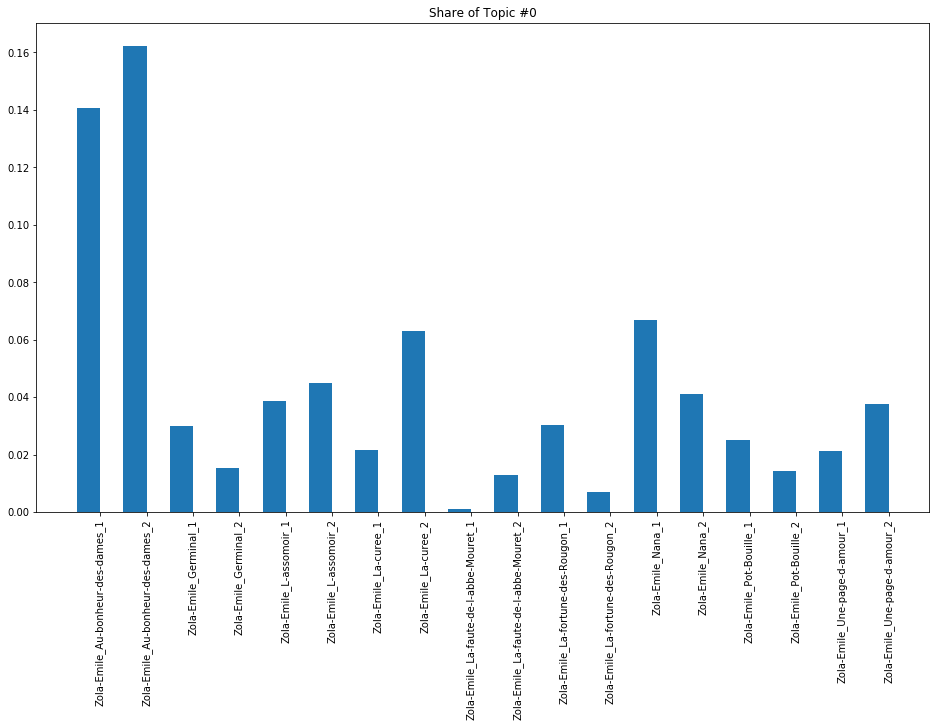

In [31]:
plt.show()

In [32]:
plots = []

In [33]:
height_cumulative = np.zeros(N)

In [34]:
for k in range(K):
    color = plt.cm.tab20(k/K, 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += doctopic[:, k]
    plots.append(p)

In [35]:
plt.ylim((0, 1))

(0, 1)

In [36]:
plt.ylabel('Topics')

Text(0,0.5,'Topics')

In [37]:
plt.title('Topics in novels')

Text(0.5,1,'Topics in novels')

In [38]:
list_topics =['transports', 'nature', 'corps médical', 'noblesse', 'parties de la maison', '?', 'religion', 'lettres/livres', '?', 'argent/position sociale','sentiment','armée','féminin','noblesse féminine','?','corps','justice/crime','famille','noblesse','marine']

In [39]:
plt.xticks(rotation=90)
plt.xticks(ind+width/2, novel_names)
index=1
for name in novel_names:
    print('numero '+str(index))
    print(name)
    index+=1

numero 1
Zola-Emile_Au-bonheur-des-dames_1
numero 2
Zola-Emile_Au-bonheur-des-dames_2
numero 3
Zola-Emile_Germinal_1
numero 4
Zola-Emile_Germinal_2
numero 5
Zola-Emile_L-assomoir_1
numero 6
Zola-Emile_L-assomoir_2
numero 7
Zola-Emile_La-curee_1
numero 8
Zola-Emile_La-curee_2
numero 9
Zola-Emile_La-faute-de-l-abbe-Mouret_1
numero 10
Zola-Emile_La-faute-de-l-abbe-Mouret_2
numero 11
Zola-Emile_La-fortune-des-Rougon_1
numero 12
Zola-Emile_La-fortune-des-Rougon_2
numero 13
Zola-Emile_Nana_1
numero 14
Zola-Emile_Nana_2
numero 15
Zola-Emile_Pot-Bouille_1
numero 16
Zola-Emile_Pot-Bouille_2
numero 17
Zola-Emile_Une-page-d-amour_1
numero 18
Zola-Emile_Une-page-d-amour_2


In [40]:
plt.yticks(np.arange(0, 1, 10))

([<matplotlib.axis.YTick at 0x7f33de12d208>],
 <a list of 1 Text yticklabel objects>)

In [41]:
#Pour cette expérience, topic 0 : aventure ; topic 1 : argent ; topic 2 : mort
topic_labels = [k for k in list_topics]

In [42]:
plt.legend([p[0] for p in plots], topic_labels)

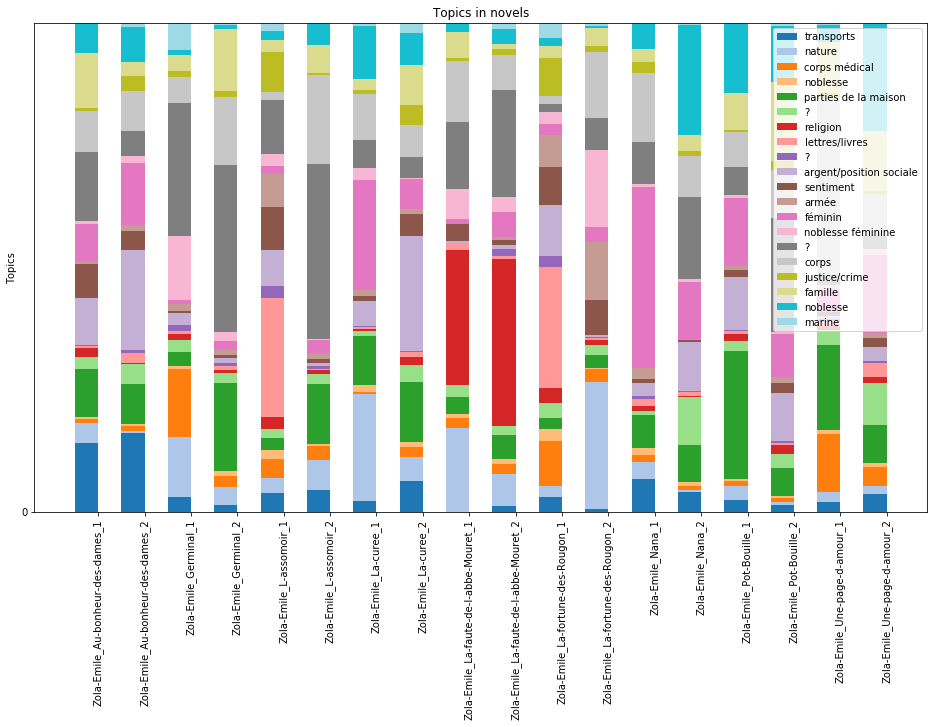

In [43]:
plt.show()